In [17]:
"""
The purpose of this program is to demonstrate deep learning through analyzing the given .cvs data file
This is a modified version of the program made by josephlee94 on GitHub

Link to Original Program: https://github.com/josephlee94/intuitive-deep-learning

Author: Benjamin A. Burr
HW 10
"""

#imports
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers


#Import cvs file and isplay contents

df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
#store cvs file data into DataFrame, display datadram

dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [5]:
#Prep and min-max scale DataFrame, display scale.

X = dataset[:,0:10]
Y = dataset[:,10]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [6]:
#Create validation and test sets, display results

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [11]:
#Create, configuire, and train a Sequential model, display progress history

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 11ms/step - loss: 0.6762 - accuracy: 0.5068 - val_loss: 0.6710 - val_accuracy: 0.5205
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6701 - accuracy: 0.5088 - val_loss: 0.6646 - val_accuracy: 0.5342
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.5342 - val_loss: 0.6582 - val_accuracy: 0.5753
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6566 - accuracy: 0.5998 - val_loss: 0.6532 - val_accuracy: 0.6621
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6517 - accuracy: 0.6996 - val_loss: 0.6492 - val_accuracy: 0.6941
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.7025 - val_loss: 0.6455 - val_accuracy: 0.7123
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6437 - accuracy: 0.7250 - val_loss: 0.6418 - val_accuracy: 0.7260
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3373 - accuracy: 0.8650 - val_loss: 0.3557 - val_accuracy: 0.8676
Epoch 60/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3337 - accuracy: 0.8630 - val_loss: 0.3566 - val_accuracy: 0.8584
Epoch 61/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3319 - accuracy: 0.8640 - val_loss: 0.3520 - val_accuracy: 0.8630
Epoch 62/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3290 - accuracy: 0.8630 - val_loss: 0.3492 - val_accuracy: 0.8676
Epoch 63/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3268 - accuracy: 0.8630 - val_loss: 0.3491 - val_accuracy: 0.8630
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3245 - accuracy: 0.8659 - val_loss: 0.3456 - val_accuracy: 0.8676
Epoch 65/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3223 - accuracy: 0.8640 - val_loss: 0.3444 - val_accuracy: 0.8630
Epoch 

In [8]:
#Evaluate model with test sets, display results

model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2509 - accuracy: 0.9041


0.9041095972061157

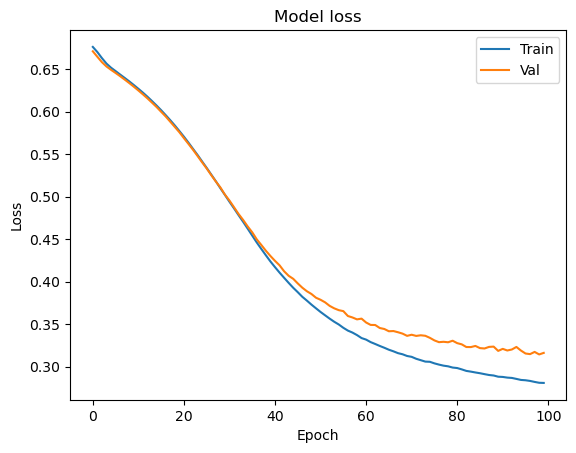

In [13]:
# Create and display graph based on training/validation lost through each epoch

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

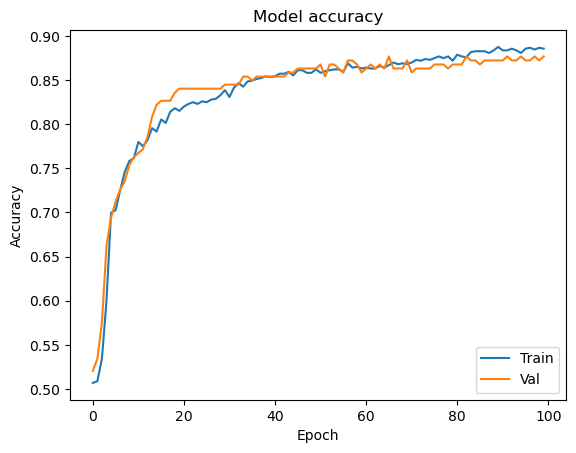

In [16]:
# Create and display graph based on training/validation accuracy through each epoch

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [18]:
#Create, configuire, and train a second Sequential model, display progress history

model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4788 - accuracy: 0.7593 - val_loss: 0.3995 - val_accuracy: 0.8630
Epoch 2/100
32/32 [==============================] - 1s 18ms/step - loss: 0.3454 - accuracy: 0.8513 - val_loss: 0.5026 - val_accuracy: 0.8082
Epoch 3/100
32/32 [==============================] - 1s 17ms/step - loss: 0.3114 - accuracy: 0.8630 - val_loss: 0.3438 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2779 - accuracy: 0.8845 - val_loss: 0.3951 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 1s 18ms/step - loss: 0.2900 - accuracy: 0.8826 - val_loss: 0.3113 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 16ms/step - loss: 0.2594 - accuracy: 0.8914 - val_loss: 0.3427 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 1s 17ms/step - loss: 0.2440 - accuracy: 0.8933 - val_loss: 0.3372 - val_accuracy: 0.8767
Epoch 

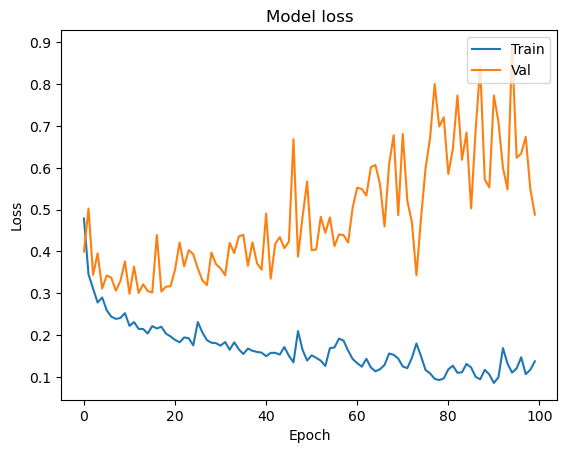

In [19]:
# Create and display graph based on training/validation lost through each epoch

plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

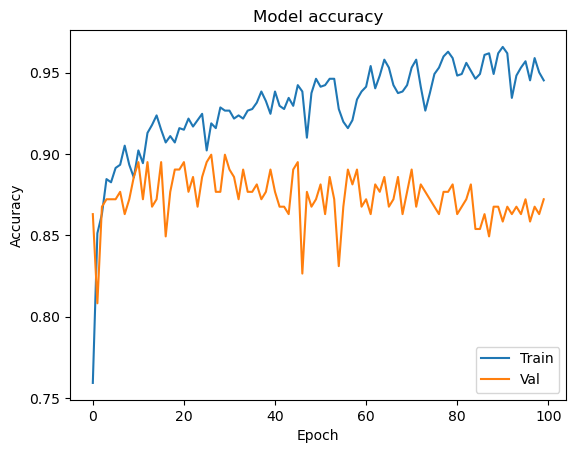

In [20]:
# Create and display graph based on training/validation accuracy through each epoch

plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [21]:
#Create, configuire, and train a third Sequential model, display progress history

model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 31ms/step - loss: 14.2428 - accuracy: 0.5949 - val_loss: 3.9063 - val_accuracy: 0.6530
Epoch 2/100
32/32 [==============================] - 1s 23ms/step - loss: 1.6660 - accuracy: 0.8337 - val_loss: 0.6418 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 1s 23ms/step - loss: 0.5910 - accuracy: 0.8523 - val_loss: 0.5136 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 1s 22ms/step - loss: 0.5090 - accuracy: 0.8591 - val_loss: 0.5011 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 24ms/step - loss: 0.5033 - accuracy: 0.8591 - val_loss: 0.5139 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4751 - accuracy: 0.8669 - val_loss: 0.5157 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 1s 22ms/step - loss: 0.4834 - accuracy: 0.8650 - val_loss: 0.4795 - val_accuracy: 0.8858
Epoch

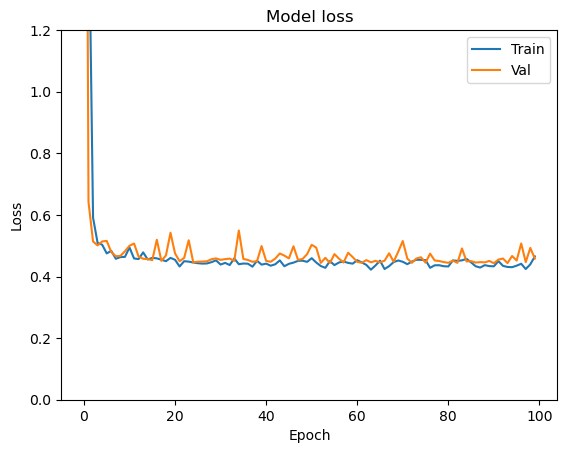

In [22]:
# Create and display graph based on training/validation lost through each epoch

plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

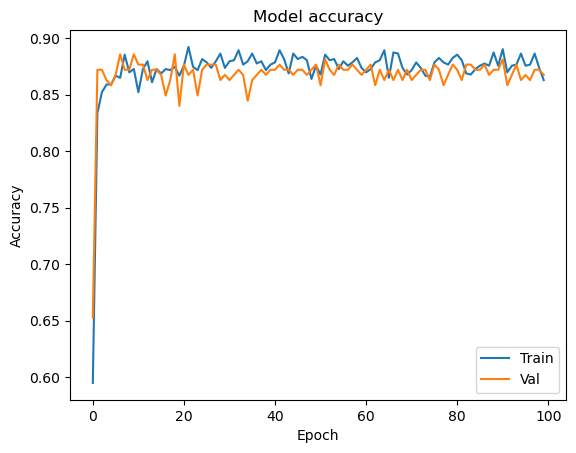

In [23]:
# Create and display graph based on training/validation accuracy through each epoch

plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()